# Perform exploratory data analysis and plots time taken against different days for each of meal type

### Authors

| Name | Roll Number |
| - | - |
| Gautam Singh | CS21BTECH11018 |
| Jaswanth Beere | BM21BTECH11007 |

This `.ipynb` file perform an exploratory data analysis and plots time taken against different days for each of meal type.


## Package Imports

The required packages for the prediction are specified here

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Datasets

The `pandas` library is used to load the `csv` files.

In [5]:
df = pd.read_csv("../data/Meal Durations.csv")

In [6]:
df

,day,start_time,is_holiday,meal_type,location,busy_after,hunger,num_courses,meal_duration
0,4,642,0,0,0,1,3,1,12
1,4,801,0,1,0,1,2,1,16
2,4,1201,0,2,1,1,1,1,9
3,4,1304,0,3,1,0,2,3,43
4,4,1805,0,4,0,1,1,1,15
...,...,...,...,...,...,...,...,...,...
79,3,832,0,1,0,1,2,2,40
80,3,1024,0,2,1,1,2,1,3
81,3,1326,0,3,1,1,2,3,22
82,3,1523,0,4,0,1,2,1,20


In [7]:
hunger_meanings = ["not hungry", "slightly hungry", "routine hunger", "very hungry"]
location_meanings = ["at home", "at college", "elsewhere"]
meal_type_meanings = ["morning", "breakfast", "mid-morning", "lunch", "evening", "dinner", "emergency"]
day_meanings = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

In [8]:
df['start_time'] = df['start_time'].apply(lambda x: (int(str(x)[0]) * 60 + int(str(x)[1:])) if x < 999 else (int(str(x)[:2]) * 60 + int(str(x)[2:])))


In [9]:
df.head()

,day,start_time,is_holiday,meal_type,location,busy_after,hunger,num_courses,meal_duration
0,4,402,0,0,0,1,3,1,12
1,4,481,0,1,0,1,2,1,16
2,4,721,0,2,1,1,1,1,9
3,4,784,0,3,1,0,2,3,43
4,4,1085,0,4,0,1,1,1,15


In [10]:
df['start_time'] = df['start_time']/(24*60)


In [11]:
df.head(20).iloc[:, [0, 1, 3]]

,day,start_time,meal_type
0,4,0.279167,0
1,4,0.334028,1
2,4,0.500694,2
3,4,0.544444,3
4,4,0.753472,4
5,4,0.819444,5
6,5,0.286806,0
7,5,0.371528,1
8,5,0.444444,2
9,5,0.548611,3


In [12]:
df.columns

Index(['day', 'start_time', 'is_holiday', 'meal_type', 'location',
       'busy_after', 'hunger', 'num_courses', 'meal_duration'],
      dtype='object')

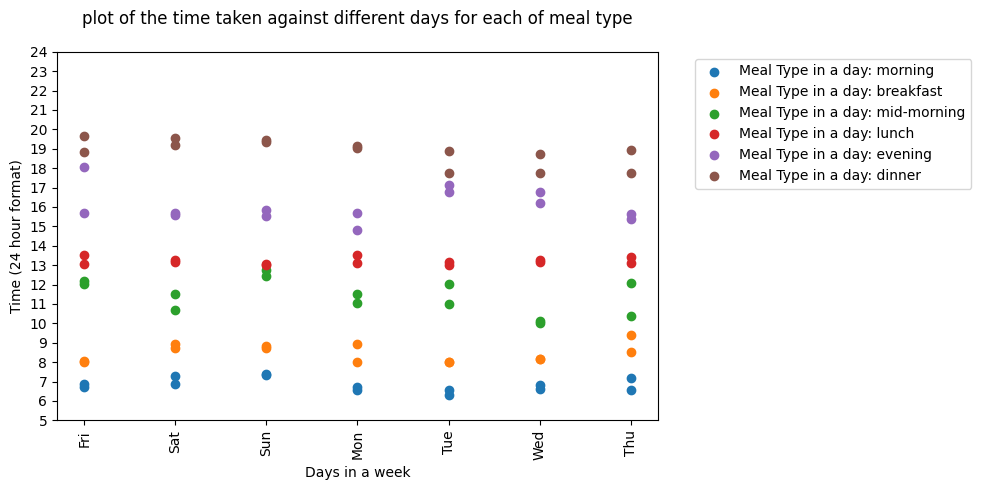

In [13]:
plt.figure(figsize=(10, 5))
for meal_type in range(6):
    # Filter data for the specific meal type
    filtered_data = [df['start_time'][i] for i in range(len(df['meal_type'])) if df['meal_type'][i] == meal_type]
    days = [day_meanings[df['day'][i]] for i in range(len(df['meal_type'])) if df['meal_type'][i] == meal_type]
    filtered_data_24hr = [round(time * 24, 2) for time in filtered_data]
    # Plotting
    plt.scatter(days, filtered_data_24hr, label=f"Meal Type in a day: {meal_type_meanings[meal_type]}")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Days in a week')
plt.ylabel('Time (24 hour format)')
plt.yticks(range(5, 25, 1))
plt.xticks(rotation='vertical')
plt.title("plot of the time taken against different days for each of meal type", pad=20)
plt.tight_layout()
plt.show()